In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import make_scorer, accuracy_score, roc_auc_score
!pip install scikeras
from scikeras.wrappers import KerasClassifier
from google.colab import drive
!pip install streamlit
import streamlit as st


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 51.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 25.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 92.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.4 MB/s eta 0:00:00


In [3]:
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/CustomerChurn_dataset.csv')

Mounted at /content/drive


**FEATURE EXTRACTION**

In [4]:
df.replace('', np.nan, inplace=True)
df.dropna(inplace=True)

In [5]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [6]:
# Features to extract
# selected_features = df.drop(['customerID'], axis = 1)
selected_features = [
    'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']

# Extracting relevant features from the dataset
df_selected_features = df[selected_features]
df_selected = df[selected_features + ['Churn']]

In [7]:
df_selected

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


**EXPLORATORY DATA ANALYSIS**

<Figure size 1500x1200 with 0 Axes>

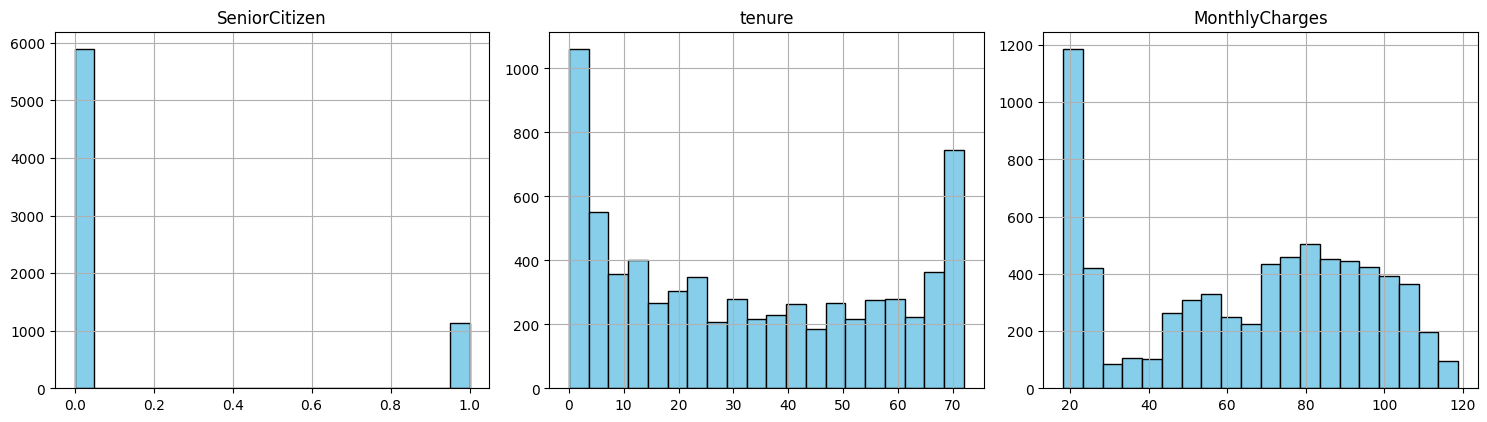

In [8]:
#Data Distribution
plt.figure(figsize=(15, 12))
df_selected.hist(bins=20, color='skyblue', edgecolor='black', layout=(3, 3), figsize=(15, 12))
plt.tight_layout()
plt.show()

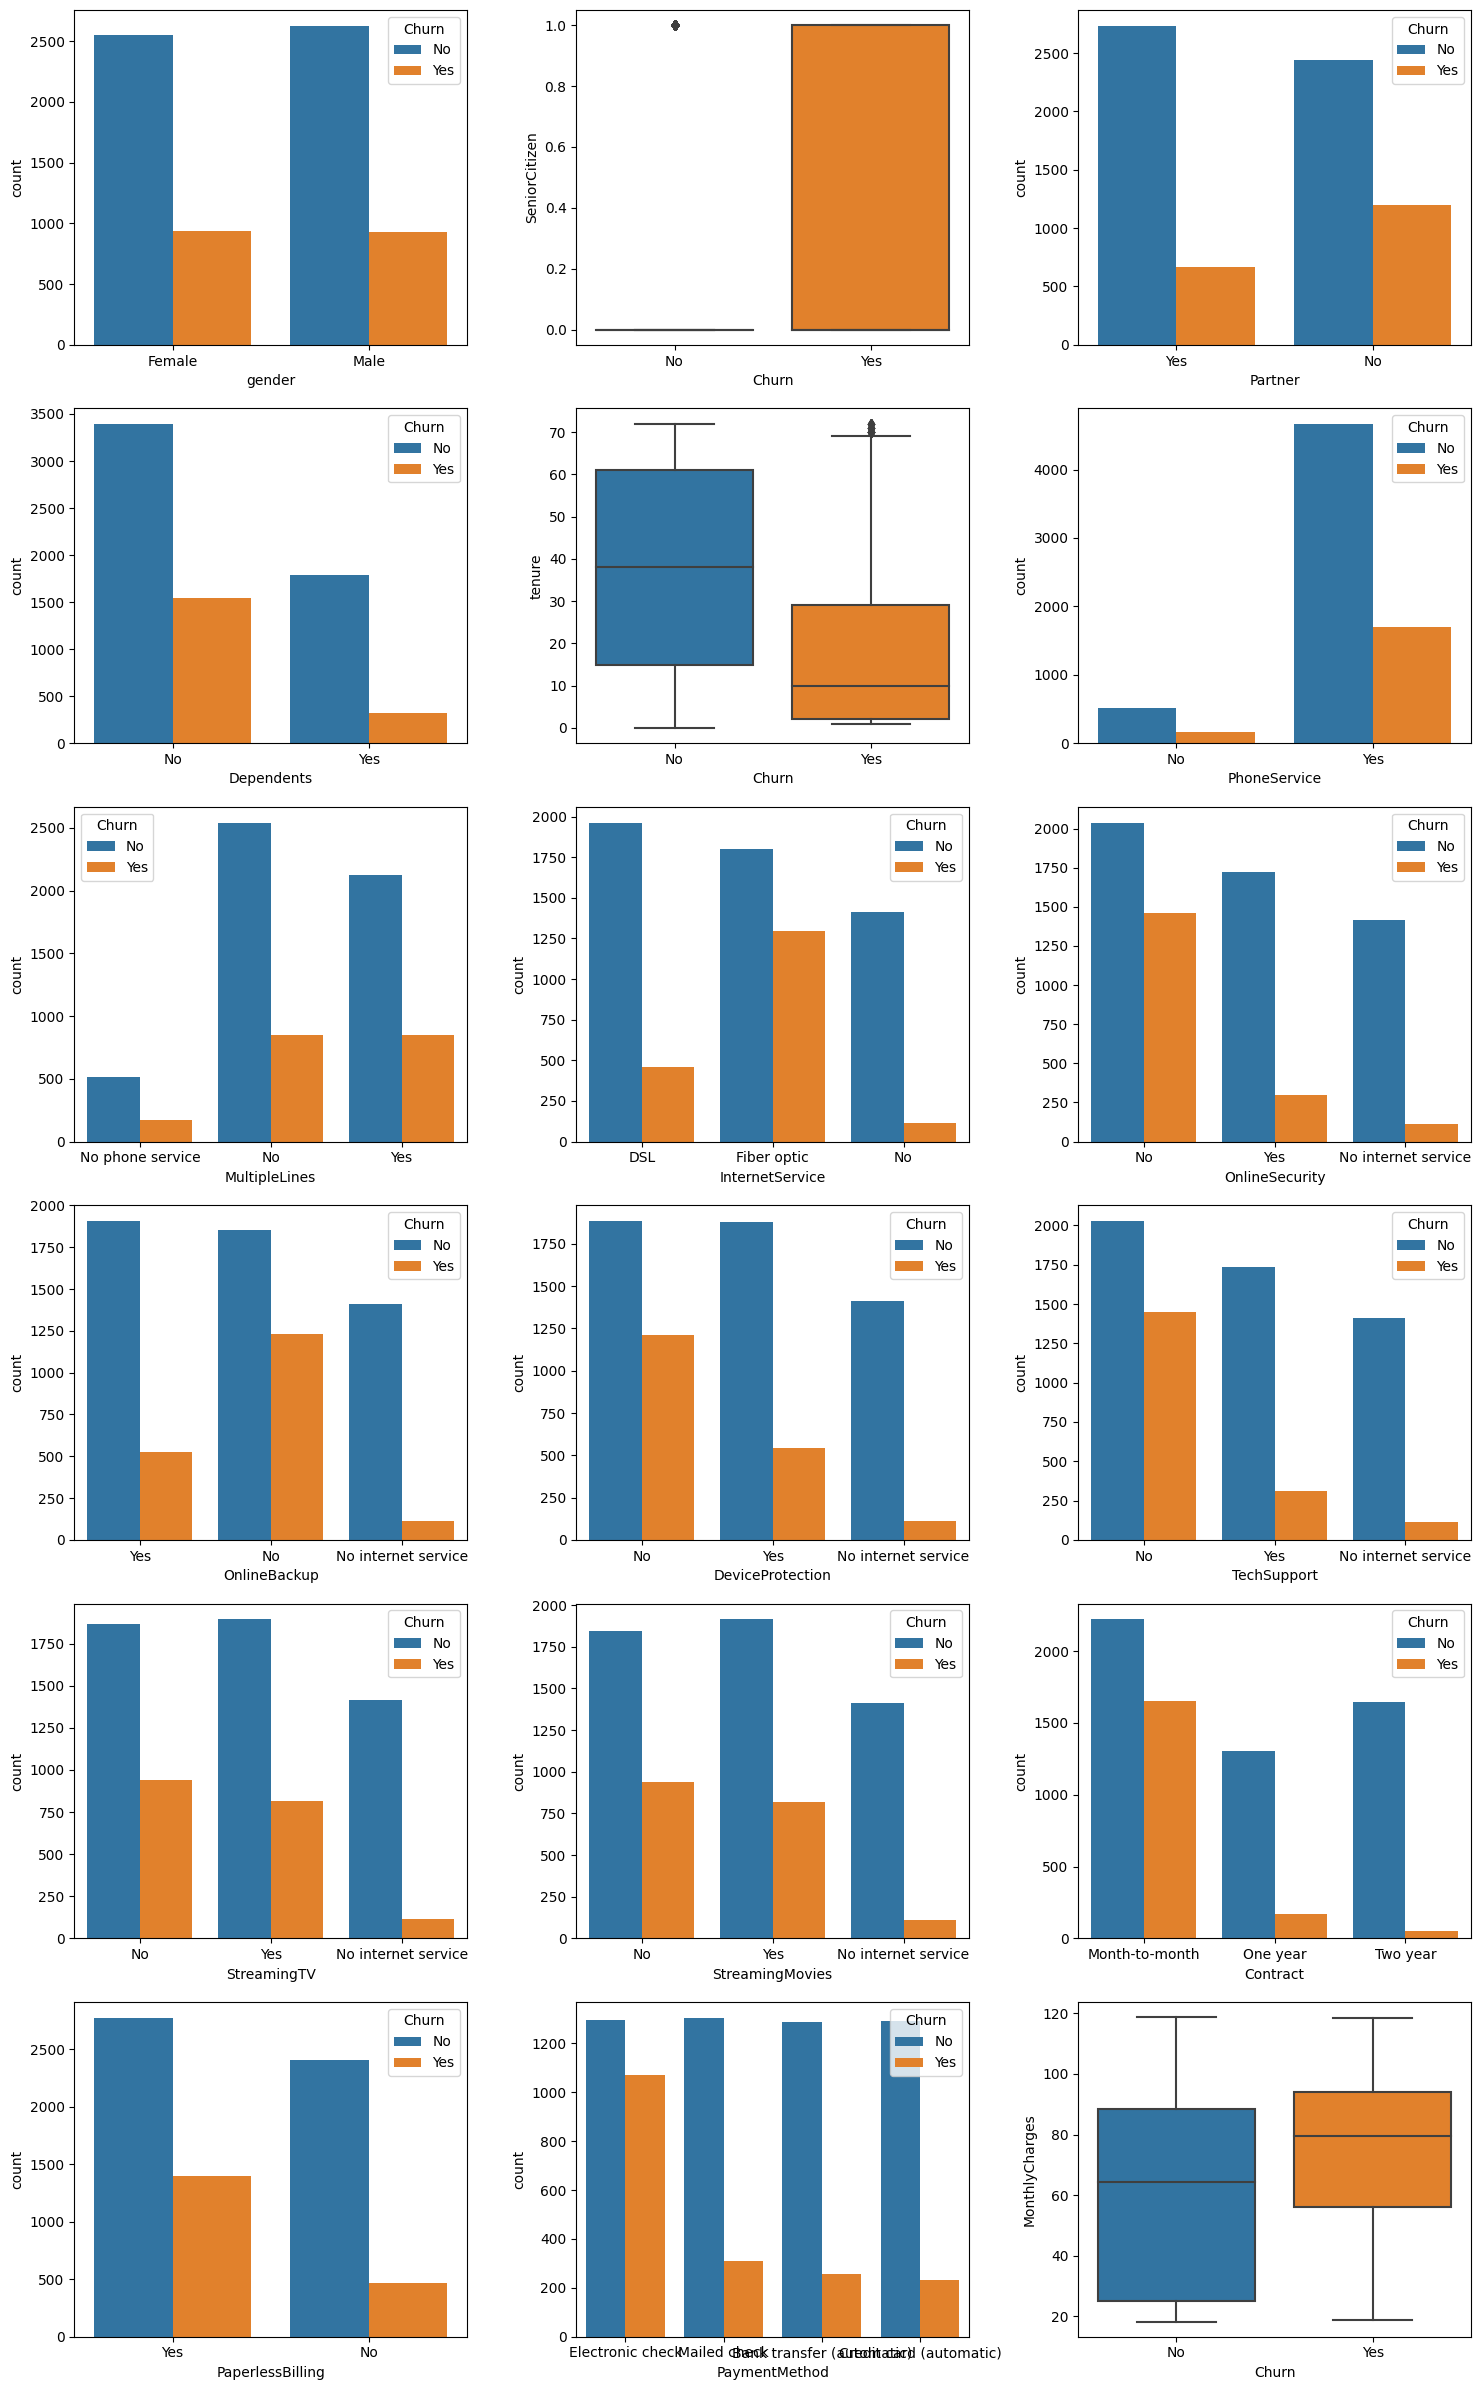

In [9]:
# Outlier Detection using Box Plots
num_features = len(selected_features[:-1])
num_rows = int(np.ceil(num_features / 3))
num_cols = min(num_features, 3)

plt.figure(figsize=(15, 4 * num_rows))

for i, column in enumerate(selected_features[:-1], 1):
    plt.subplot(num_rows, num_cols, i)

    # Check if the column contains numeric data
    if df[column].dtype in ['int64', 'float64']:
        sns.boxplot(x='Churn', y=column, data=df)
    else:
        # Handle non-numeric or mixed-type data
        sns.countplot(x=column, hue='Churn', data=df)

plt.tight_layout()
plt.show()

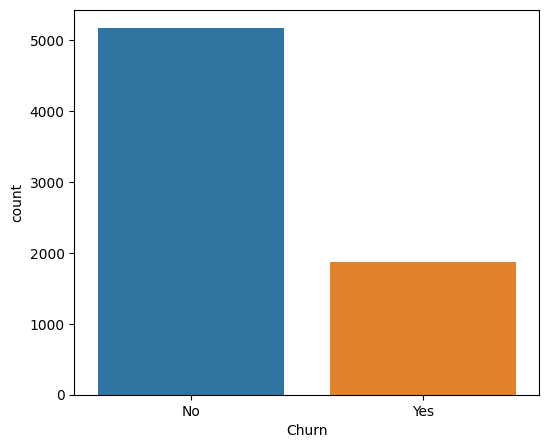

In [9]:
# Churn Analysis
plt.figure(figsize=(6, 5))
sns.countplot(x='Churn', data=df)
plt.show()

<Figure size 2000x2000 with 0 Axes>

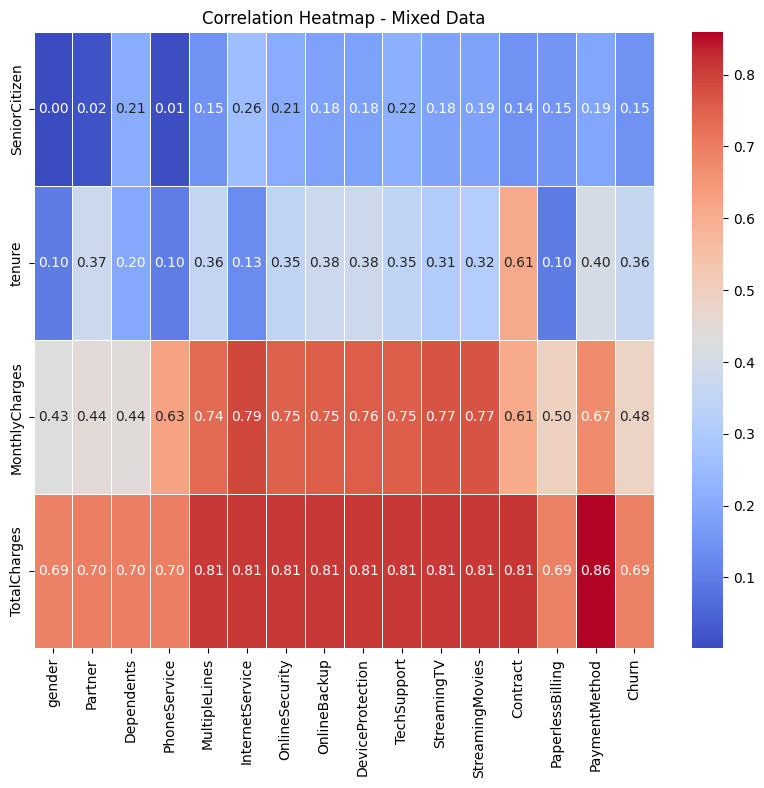

In [14]:
# Feature Relationships
plt.figure(figsize=(20, 20))
# Select the top 7 features with the highest absolute correlation with the target variable 'Churn'
#top_features = df[numeric_features + categorical_features + ['Churn']].corr()['Churn'].abs().nlargest(8).index
#top_feature_corr = df[top_features].corr()

# Separate features into numeric and categorical
numeric_features = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
categorical_features = [col for col in df_selected if col not in numeric_features]

from scipy.stats import chi2_contingency

def correlation_ratio(categories, values):
    f_obs = pd.crosstab(categories, values)
    chi2, _, _, _ = chi2_contingency(f_obs)
    cr = np.sqrt(chi2 / (chi2 + len(categories) - 1))
    return cr

# Initialize a correlation matrix
corr_matrix = np.zeros((len(df[numeric_features].columns), len(df[categorical_features].columns)))

# Fill in the correlation matrix with correlation ratios
for i, num_col in enumerate(df[numeric_features].columns):
    for j, cat_col in enumerate(df[categorical_features].columns):
        corr_matrix[i, j] = correlation_ratio(df[cat_col], df[num_col])

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5,
            xticklabels=df[categorical_features].columns, yticklabels=df[numeric_features].columns)
plt.title('Correlation Heatmap - Mixed Data')
plt.show()



<Figure size 1200x800 with 0 Axes>

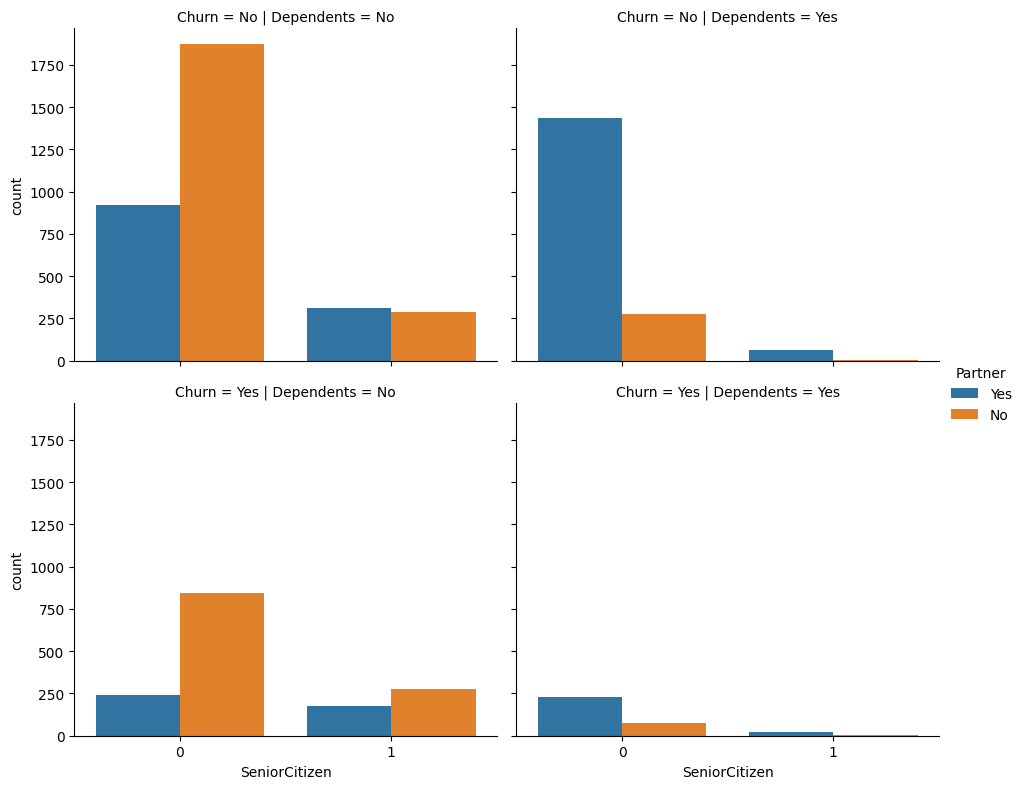

In [11]:
# Customer Profiles and Churning
plt.figure(figsize=(12, 8))
sns.catplot(x='SeniorCitizen', hue='Partner', col='Dependents', row='Churn',
            data=df, kind='count', height=4, aspect=1.2)
plt.show()

**TRAINING AN MLP MODEL USING FUNCTION API**

In [10]:
# Training an MLP model using the Functional API
def create_mlp_model(input_dim, hidden_units=64, dropout_rate=0.3):
    input_layer = tf.keras.layers.Input(shape=(input_dim,))
    layer_1 = tf.keras.layers.Dense(hidden_units, activation='relu')(input_layer)
    layer_2 = tf.keras.layers.Dropout(dropout_rate)(layer_1)
    output = tf.keras.layers.Dense(1, activation='sigmoid')(layer_2)

    model = tf.keras.Model(inputs=input_layer, outputs=output)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [19]:
# Separate features into numeric and categorical
numeric_features = df_selected_features.select_dtypes(include = [np.number]).columns
categorical_features = df_selected_features.select_dtypes(exclude = [np.number]).columns

# Extracting features and encoding target variable
encoder = OneHotEncoder(drop='first', sparse=False)
X_encoded = encoder.fit_transform(df_selected_features[categorical_features])
df_encoded_categorical = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(categorical_features))
x = pd.concat([df_selected_features[numeric_features], df_encoded_categorical], axis=1)

y_encoded = encoder.fit_transform(df_selected[['Churn']])
y = pd.DataFrame(y_encoded, columns=encoder.get_feature_names_out(['Churn']))

df_encoded = pd.concat([x, y], axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Index(['SeniorCitizen', 'tenure', 'MonthlyCharges'], dtype='object')

In [23]:
# Hyperparameter tuning with GridSearchCV
mlp_model = KerasClassifier(build_fn=create_mlp_model, input_dim=x.shape[1], epochs=50, batch_size=128,hidden_units=32, dropout_rate=0.8, verbose=0)

param_grid = {'hidden_units': [32, 64, 128], 'dropout_rate': [0.3, 0.5, 0.8]}

#scoring metric for GridSearchCV
scorer = make_scorer(roc_auc_score)

# Perform GridSearchCV with cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(estimator=mlp_model, param_grid=param_grid, scoring=scorer, cv=cv)
grid_result = grid_search.fit(x, y)

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras

In [24]:
# Create a KerasClassifier wrapper for use in GridSearchCV
#mlp_model = KerasClassifier(build_fn=create_mlp_model, input_dim=X.shape[1], hidden_units=32, epochs=5, batch_size=32, dropout_rate=0.5, verbose=0)

**TESTING AND OPTIMIZATION**

In [25]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [26]:
# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
# Using the best hyperparameters from GridSearchCV
best_hidden_units = grid_result.best_params_['hidden_units']
best_dropout_rate = grid_result.best_params_['dropout_rate']

In [28]:
# Creating and training the optimized model
optimized_model = create_mlp_model(input_dim=X_train.shape[1], hidden_units=best_hidden_units, dropout_rate=best_dropout_rate)
optimized_model.fit(X_train_scaled, y_train, epochs=250, batch_size=50, validation_split=0.2, verbose=0)
optimized_model.summary()

Model: "model_46"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_47 (InputLayer)       [(None, 6559)]            0         
                                                                 
 dense_92 (Dense)            (None, 64)                419840    
                                                                 
 dropout_46 (Dropout)        (None, 64)                0         
                                                                 
 dense_93 (Dense)            (None, 1)                 65        
                                                                 
Total params: 419905 (1.60 MB)
Trainable params: 419905 (1.60 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [29]:
# Evaluating the model on the test set
y_pred_proba = optimized_model.predict(X_test_scaled)
y_pred_binary = (y_pred_proba > 0.5).astype(int)

45/45 [==============================] - 0s 3ms/step


In [30]:
# Calculating accuracy and AUC score
accuracy = accuracy_score(y_test, y_pred_binary)
auc_score = roc_auc_score(y_test, y_pred_proba)

In [31]:
# Print evaluation metrics
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test AUC Score: {auc_score:.4f}")

Test Accuracy: 0.7055
Test AUC Score: 0.7501


In [32]:
import pickle

pickle.dump(optimized_model, open('/content/drive/My Drive/Colab Notebooks/Churning Customers.pkl', 'wb'))

























